<a href="https://colab.research.google.com/github/DaveStutler/G9/blob/master/TEAM_FRIENDSHIP_PARTICLES_WOOOOO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install uproot awkward
!pip install pandas


!pip install lumin uproot
!git clone https://github.com/SauceCat/PDPbox.git && cd PDPbox && pip install -e .

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 334.2/334.2 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 697.9/697.9 kB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 611.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.1/208.1 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 MB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of lumin to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.3/169.3 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5

Cloning into 'PDPbox'...
remote: Enumerating objects: 2120, done.
remote: Counting objects: 100% (683/683), done.
remote: Compressing objects: 100% (334/334), done.
remote: Total 2120 (delta 383), reused 615 (delta 326), pack-reused 1437
Receiving objects: 100% (2120/2120), 301.15 MiB | 23.48 MiB/s, done.
Resolving deltas: 100% (1181/1181), done.
Updating files: 100% (76/76), done.
Obtaining file:///content/PDPbox
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 76.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 94.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 16.1 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uni

#Installs

## Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from scipy import sparse
from scipy.sparse import csr_matrix
import uproot
import pandas as pd
import numpy
import matplotlib.pyplot as plt

## Data Exploration

#All plots from linear

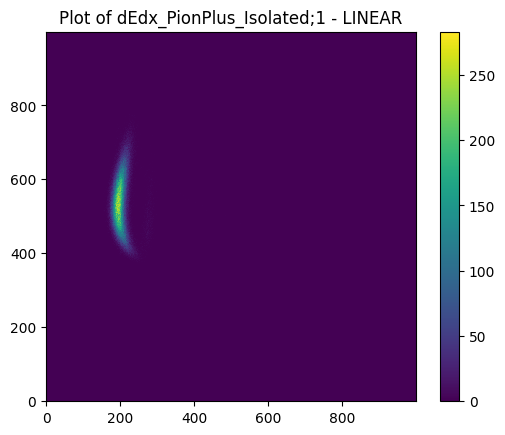

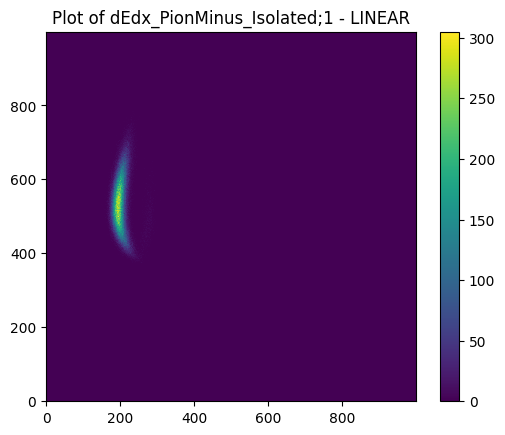

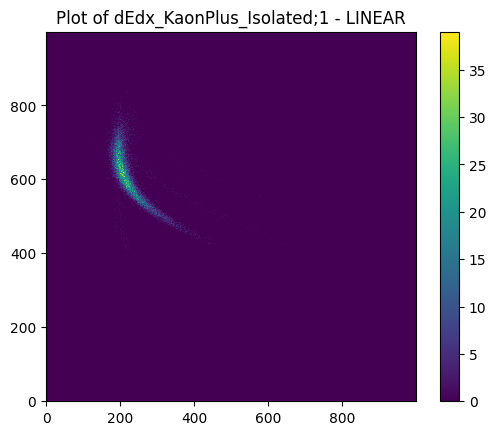

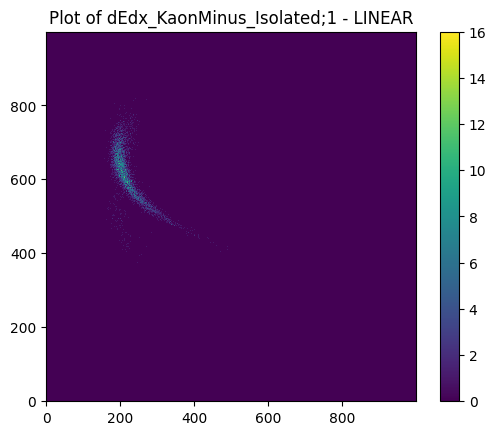

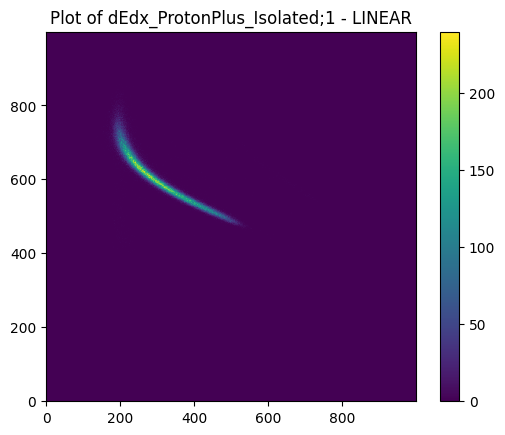

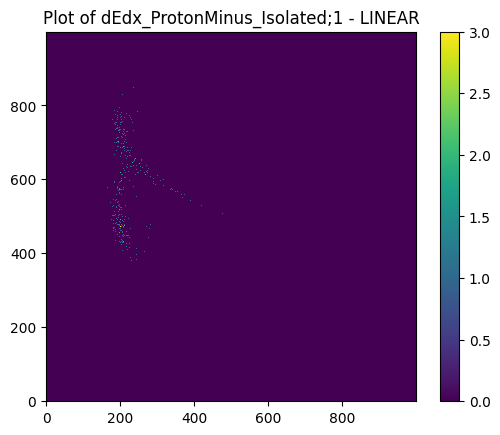

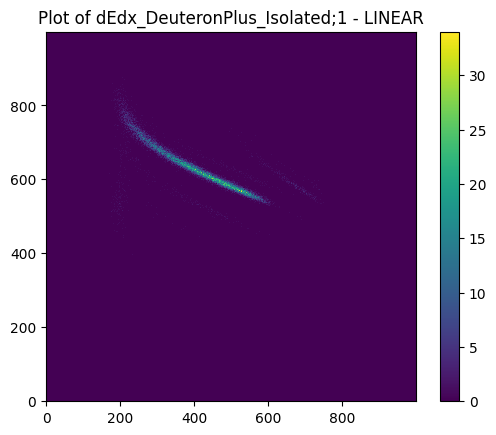

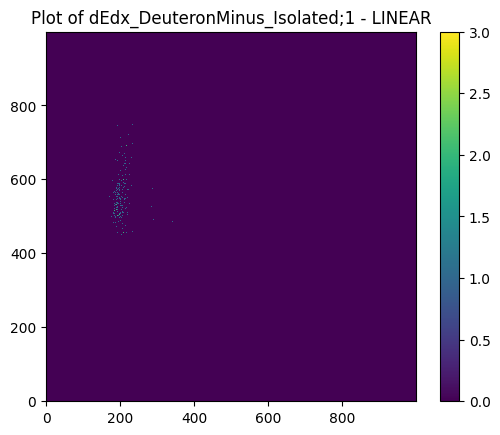

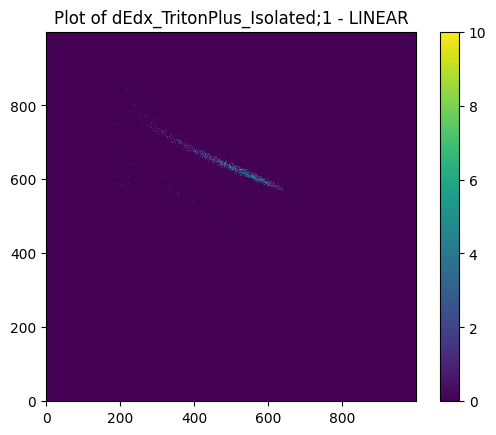

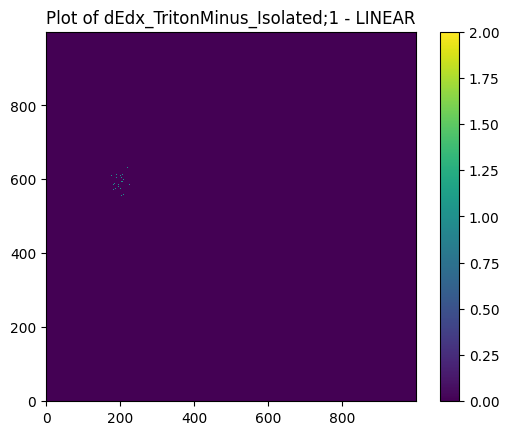

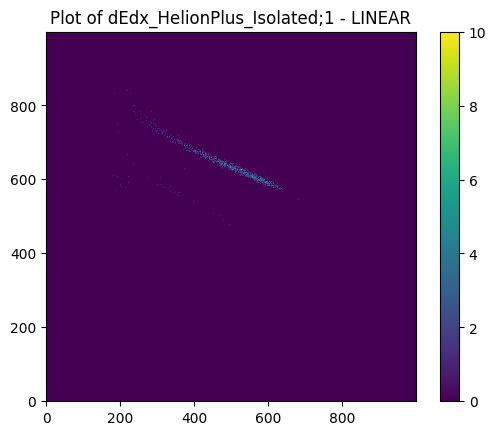

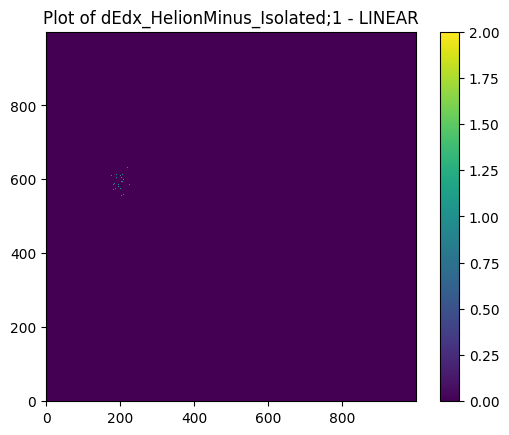

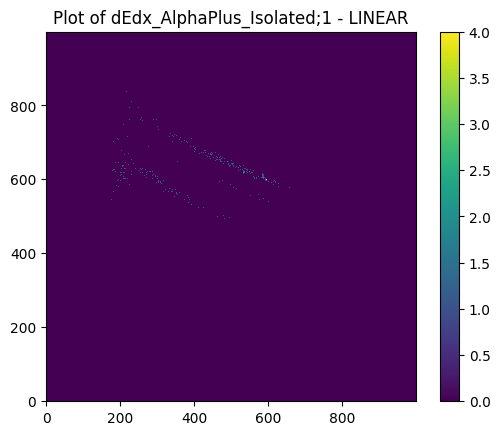

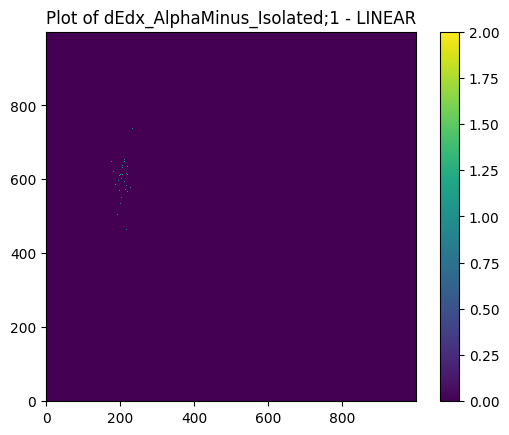

In [4]:

root_file = uproot.open("/content/Output_File_2023_02_15.root")
tree_names = ['dEdx_PionPlus_Isolated;1', 'dEdx_PionMinus_Isolated;1', 'dEdx_KaonPlus_Isolated;1',
'dEdx_KaonMinus_Isolated;1',
'dEdx_ProtonPlus_Isolated;1',
'dEdx_ProtonMinus_Isolated;1',
'dEdx_DeuteronPlus_Isolated;1',
'dEdx_DeuteronMinus_Isolated;1',
'dEdx_TritonPlus_Isolated;1',
'dEdx_TritonMinus_Isolated;1',
'dEdx_HelionPlus_Isolated;1',
'dEdx_HelionMinus_Isolated;1',
'dEdx_AlphaPlus_Isolated;1',
'dEdx_AlphaMinus_Isolated;1']


mydict = {}


for tree_name in tree_names:
    mydict[tree_name] = [root_file[tree_name].values()]
    plt.imshow(mydict[tree_name][0], cmap='viridis', interpolation='nearest')
    plt.colorbar()
    plt.title(f"Plot of {tree_name} - LINEAR")
    plt.gca().invert_yaxis()
    plt.show()
linear_df = pd.DataFrame(mydict)
# one hot encoding
linear_df['linear'] = 1
linear_df['circular'] = 0

#All plots from circular data

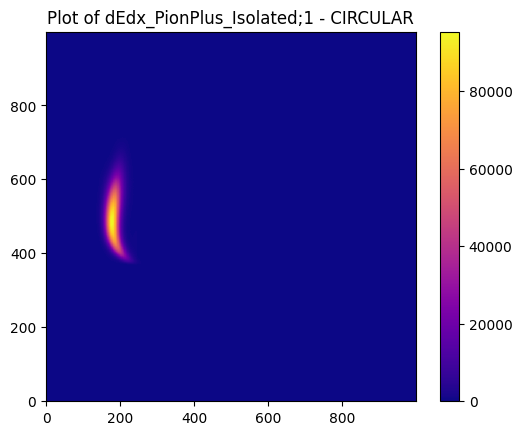

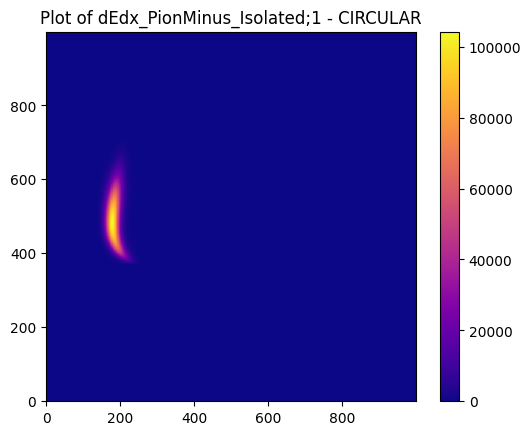

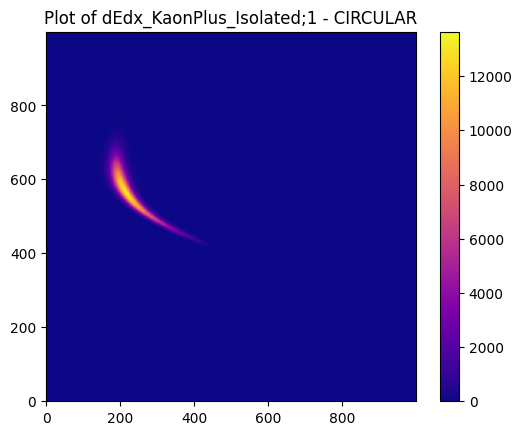

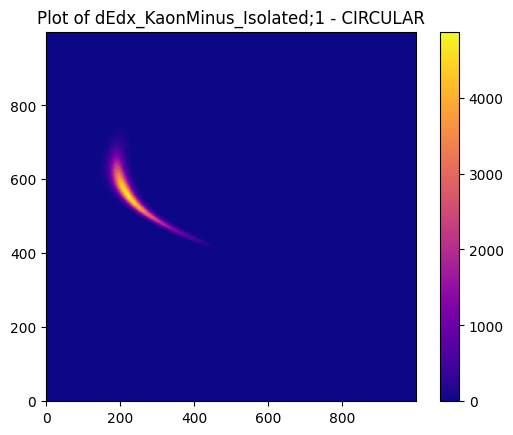

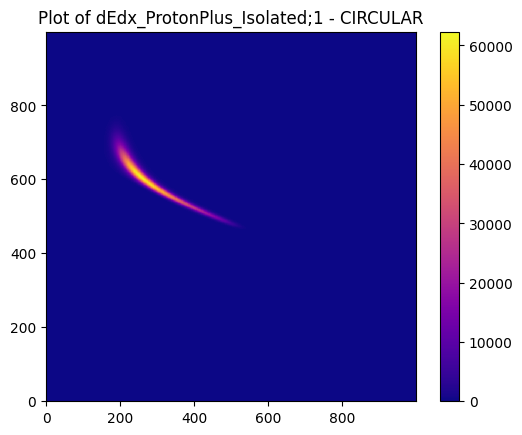

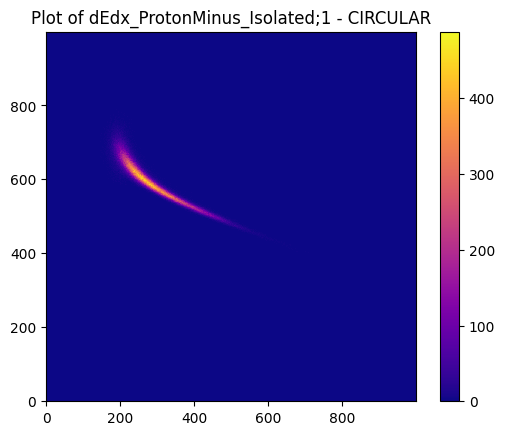

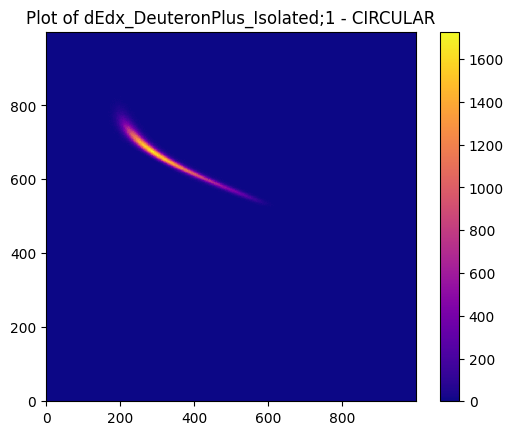

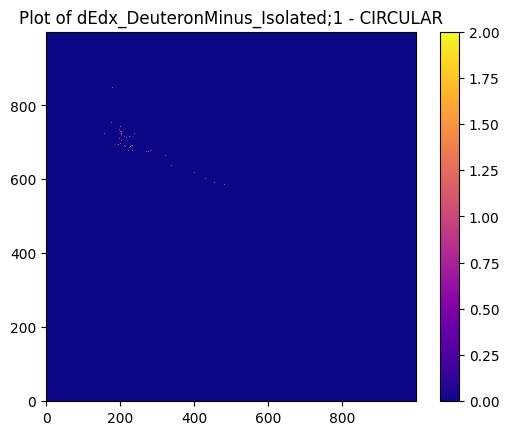

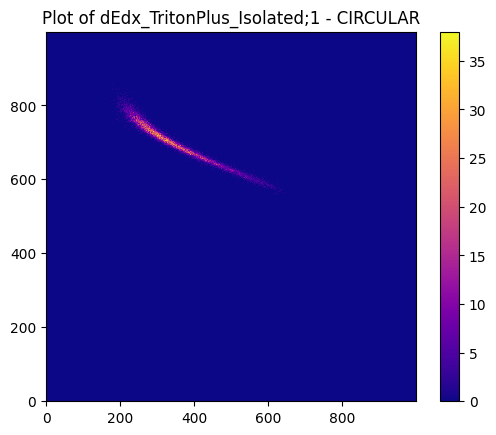

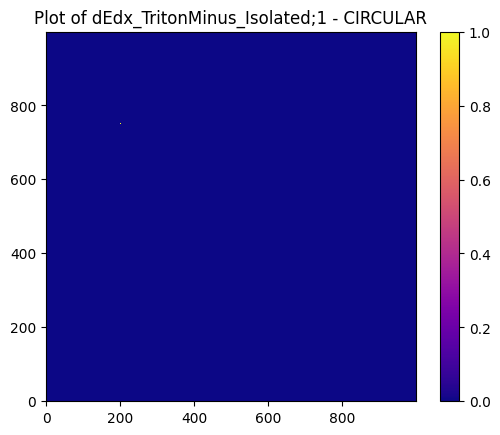

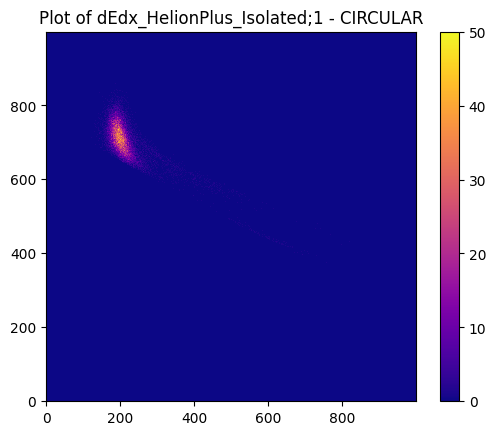

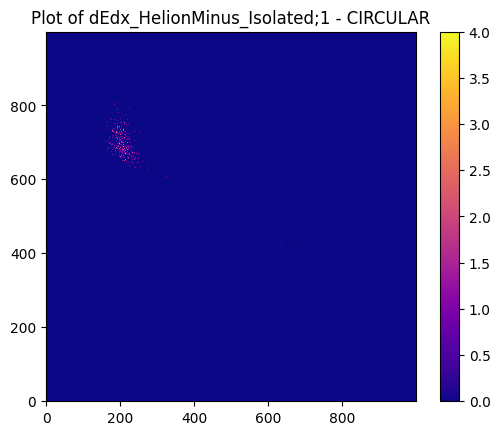

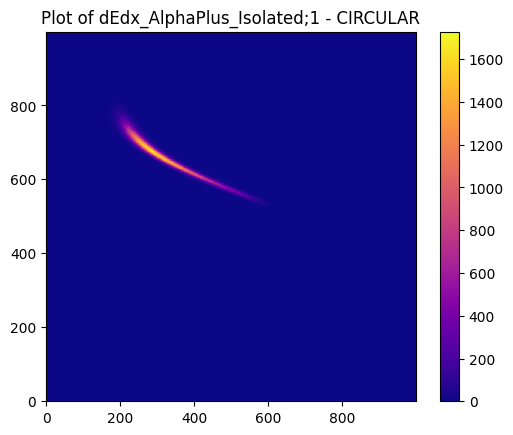

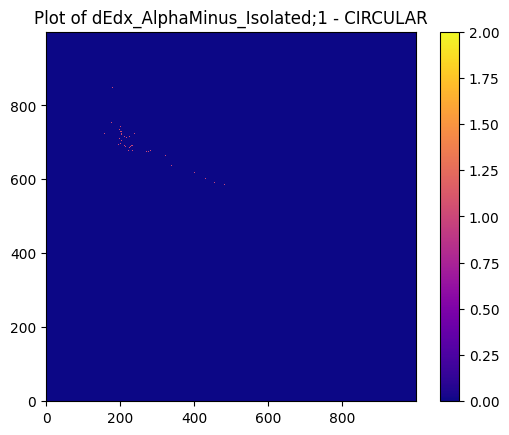

In [53]:
import uproot
import pandas as pd
import numpy
import matplotlib.pyplot as plt

root_file = uproot.open("/content/yieldHistos_7p7GeV_Pion_2022_08_31 (1).root")



tree_names = ['dEdx_PionPlus_Isolated;1', 'dEdx_PionMinus_Isolated;1', 'dEdx_KaonPlus_Isolated;1',
'dEdx_KaonMinus_Isolated;1',
'dEdx_ProtonPlus_Isolated;1',
'dEdx_ProtonMinus_Isolated;1',
'dEdx_DeuteronPlus_Isolated;1',
'dEdx_DeuteronMinus_Isolated;1',
'dEdx_TritonPlus_Isolated;1',
'dEdx_TritonMinus_Isolated;1',
'dEdx_HelionPlus_Isolated;1',
'dEdx_HelionMinus_Isolated;1',
'dEdx_AlphaPlus_Isolated;1',
'dEdx_AlphaMinus_Isolated;1']


mydict = {}



for tree_name in tree_names:
    mydict[tree_name] = [root_file[tree_name].values()]
    plt.imshow(mydict[tree_name][0], cmap='plasma', interpolation='nearest')
    plt.colorbar()
    plt.title(f"Plot of {tree_name} - CIRCULAR")
    plt.gca().invert_yaxis()
    plt.show()
circular_df = pd.DataFrame(mydict)

# one hot encoding
circular_df['linear'] = 0
circular_df['circular'] = 1



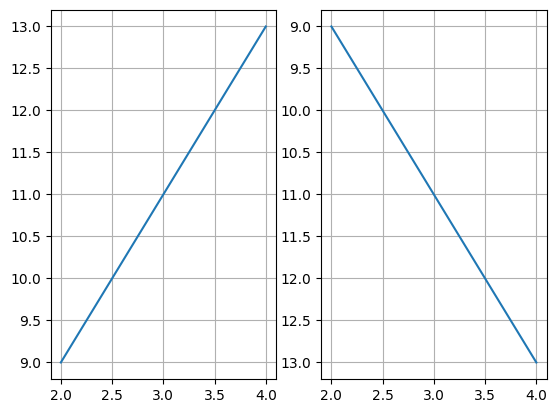

In [ ]:
#testing to make sure plt.gca().invert_yaxis() wont mess up the data:
plt.subplot(1, 2, 1)
x = np.array([2, 3, 4])
y = x * 2 + 5
plt.plot(x, y)
plt.grid(True)

plt.subplot(1, 2, 2)
x = np.array([2, 3, 4])
y = x * 2 + 5
plt.plot(x, y)
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

# ok awesome looks good!

In [81]:
combined_df = pd.concat([linear_df, circular_df], ignore_index=True)

combined_df


,dEdx_PionPlus_Isolated;1,dEdx_PionMinus_Isolated;1,dEdx_KaonPlus_Isolated;1,dEdx_KaonMinus_Isolated;1,dEdx_ProtonPlus_Isolated;1,dEdx_ProtonMinus_Isolated;1,dEdx_DeuteronPlus_Isolated;1,dEdx_DeuteronMinus_Isolated;1,dEdx_TritonPlus_Isolated;1,dEdx_TritonMinus_Isolated;1,dEdx_HelionPlus_Isolated;1,dEdx_HelionMinus_Isolated;1,dEdx_AlphaPlus_Isolated;1,dEdx_AlphaMinus_Isolated;1,linear,circular
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1,0
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0,1


# Code templete for creating dense matrices

In [90]:
#we might want to store the matrices in a more condensed format that allows us to retain the important data for preprocessing

master = pd.DataFrame()
from scipy.sparse import find
# I'm so happy I found this function because trying to do this on my own was hell! Heres the docs on how it works:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.find.html

def local_min_max_finder(df, feature):
  matrix0 = df[feature][0]
  matrix1 = df[feature][1]

  rows0, cols0, values0 = find(matrix0)
  rows0 = rows0.tolist()
  cols0 = cols0.tolist()
  values0 = values0.tolist()

  rows1, cols1, values1 = find(matrix1)
  rows1 = rows1.tolist()
  cols1 = cols1.tolist()
  values1 = values1.tolist()

  rows = rows0+rows1
  cols = cols0+cols1
  return(min(rows), max(rows), min(cols), max(cols))

def global_min_max_finder(df):
  minrows = []
  maxrows = []
  mincols = []
  maxcols = []
  for name in tree_names:
    a, b, c, d = local_min_max_finder(df, name)
    minrows.append(a)
    maxrows.append(b)
    mincols.append(c)
    maxcols.append(d)
  globalminrow = min(minrows)
  globalmaxrow = max(maxrows)
  globalmincol = min(mincols)
  globalmaxcol = max(maxcols)
  return(globalminrow, globalmaxrow, globalmincol, globalmaxcol)



def value_getter(df, feature):
    minrow, maxrow, mincol, maxcol = global_min_max_finder(df)
    local = pd.DataFrame()
    matrix0 = df[feature][0]
    matrix1 = df[feature][1]
    values0 = []
    rows0 = []
    columns0 = []

    values1 = []
    rows1 = []
    columns1 = []


    for row in range(minrow-1,maxrow+1):
      for column in range(mincol-1,maxcol+1):
        values0.append(matrix0[row, column])
        rows0.append(row)
        columns0.append(column)

        values1.append(matrix1[row, column])
        rows1.append(row)
        columns1.append(column)

    linear = ([1] * len(rows0)) + ([0]*len(rows1))
    circular = ([0] * len(rows0)) + ([1]*len(rows1))

    local['position'] = rows0 + rows1
    local['stopping power'] = columns0 + columns1
    local[feature] = values0 + values1
    local['linear'] = linear
    local['circular'] = circular

    return(local)
#print(value_getter(combined_df, tree_names[0]))
#print(value_getter(linear_df, tree_names[0]))

def recursive_merger(names, df, prev):
  if len(names) == 0:

    return(prev)

  elif prev is None:
    prev = value_getter(df, names[0])

    return recursive_merger(names[1:], df, prev)
  else:
    current = value_getter(df, names[0])
    prev = pd.merge(current, prev, on=['position', 'stopping power', 'linear', 'circular'], how='inner')
    return recursive_merger(names[1:], df, prev)

master = recursive_merger(tree_names, combined_df, None)
print(type(master))
rows_to_drop = []
for index, row in master.iterrows():
    for column in tree_names:
        if all(row[column] == 0 for column in tree_names):
          rows_to_drop.append(index)



master.drop(rows_to_drop, inplace=True)
print(master)


<class 'pandas.core.frame.DataFrame'>
        position  stopping power  dEdx_AlphaMinus_Isolated;1  linear  \
4474         367             267                           0       1   
6137         369             234                           0       1   
6161         369             258                           0       1   
6171         369             268                           0       1   
6176         369             273                           0       1   
...          ...             ...                         ...     ...   
930395       898             172                           0       0   
931246       899             175                           0       0   
933794       902             179                           0       0   
938880       908             177                           0       0   
950774       922             199                           1       0   

        circular  dEdx_AlphaPlus_Isolated;1  dEdx_HelionMinus_Isolated;1  \
4474           0     

In [103]:

'''ordered = list(master.columns[0:2]) + list(master.columns[5:]) + list([master.columns[3]]) + list([master.columns[4]])
holygrail = master[ordered]'''
#NOTE: do NOT run the above line of code more than once. Or else the ordering for master will be messed up again
holygrail = master
print(holygrail.head())

r = len(master.columns) - 2
print(r)
for column in range(r):
  column_data = holygrail[holygrail.columns[column]]
  column_name = holygrail.columns[column]
  maxim = column_data.max()
  minim = column_data.min()
  threshold = .02
  # we can change this if needed
  holygrail[column_name] = np.where(
    (column_data - minim) / (maxim - minim) > threshold,
    (column_data - minim) / (maxim - minim),
    0)
print(holygrail)


      position  stopping power  dEdx_DeuteronPlus_Isolated;1  \
4474       367             267                             0   
6137       369             234                             0   
6161       369             258                             0   
6171       369             268                             0   
6176       369             273                             0   

      dEdx_ProtonMinus_Isolated;1  dEdx_ProtonPlus_Isolated;1  \
4474                            0                           0   
6137                            0                           0   
6161                            0                           0   
6171                            0                           0   
6176                            0                           0   

      dEdx_KaonMinus_Isolated;1  dEdx_KaonPlus_Isolated;1  \
4474                          0                         0   
6137                          0                         0   
6161                          0          

In [92]:
master.to_csv('HolyGrail.csv', index=False)

# one idea is to use CSR matrix which shows the none zero rows and columns. here is an idea of how it works



In [ ]:
# code block for experimenting with different ways of doing this:

for feature in linear_df.columns:
      if feature == 'linear' or feature == 'circular':
        continue
      else:
        matrix = linear_df[feature].values[0][500:1500]
        sparse_m = sparse.csr_matrix(matrix)
        print(sparse_m)
        #print(sparse_m)
        #will print out the indexes of the non zero elements in the format: (row, column), value
        #x / row = position
        #y / column = de/dx change in energy (stopping power)
        #value = count or number of detections at that (x,y) point


  (0, 160)	1
  (0, 162)	2
  (0, 163)	6
  (0, 164)	3
  (0, 165)	7
  (0, 166)	11
  (0, 167)	6
  (0, 168)	14
  (0, 169)	11
  (0, 170)	13
  (0, 171)	15
  (0, 172)	28
  (0, 173)	23
  (0, 174)	29
  (0, 175)	37
  (0, 176)	30
  (0, 177)	58
  (0, 178)	61
  (0, 179)	73
  (0, 180)	74
  (0, 181)	121
  (0, 182)	103
  (0, 183)	138
  (0, 184)	144
  (0, 185)	141
  :	:
  (308, 207)	1
  (308, 212)	1
  (308, 238)	1
  (310, 205)	1
  (312, 230)	1
  (313, 221)	1
  (314, 191)	1
  (314, 240)	1
  (316, 247)	1
  (317, 239)	1
  (317, 262)	1
  (318, 263)	1
  (321, 199)	1
  (324, 240)	1
  (324, 241)	1
  (326, 255)	1
  (326, 262)	1
  (327, 208)	1
  (329, 231)	1
  (335, 182)	1
  (336, 238)	1
  (336, 240)	1
  (346, 232)	1
  (362, 178)	1
  (367, 208)	1
  (0, 159)	3
  (0, 161)	2
  (0, 163)	1
  (0, 164)	4
  (0, 165)	3
  (0, 166)	7
  (0, 167)	6
  (0, 168)	8
  (0, 169)	15
  (0, 170)	22
  (0, 171)	17
  (0, 172)	29
  (0, 173)	30
  (0, 174)	40
  (0, 175)	41
  (0, 176)	46
  (0, 177)	61
  (0, 178)	67
  (0, 179)	74
  (0, 180)	7